In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\\excel data\\Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
x = df.iloc[:,2:4].values

In [7]:
x.shape

(400, 2)

In [9]:
y = df.iloc[:,-1].values

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [10]:
y.shape

(400,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
x_train.shape

(320, 2)

In [15]:
x_test.shape

(80, 2)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [19]:
x_train = sc.fit_transform(x_train)

In [20]:
x_test = sc.transform(x_test)

In [21]:
# calculate K- value
# 1st method

np.sqrt(x_train.shape[0])

17.88854381999832

In [33]:
# assume that k=17

k = 17

from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=k)

In [24]:
# train model

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [47]:
y_pred = knn.predict(x_test)

In [27]:
y_pred.shape

(80,)

In [28]:
y_test.shape

(80,)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.8625

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[39,  9],
       [ 2, 30]], dtype=int64)

# 2nd method

In [37]:
accuracy = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))


In [38]:
len(accuracy)

25

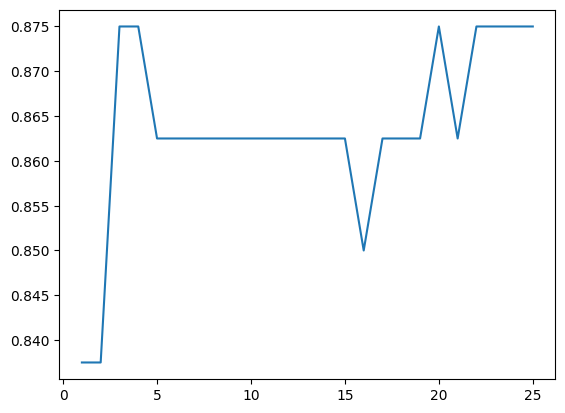

In [39]:
plt.plot(range(1,26),accuracy)

In [42]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [45]:
y_pred = knn.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.8625

In [68]:
def predict_output():
    age = int(input("enter age: "))
    salary = int(input("enter salary: "))

    x_new = np.array([[age],[salary]]).reshape(1,2)
    x_new = sc.transform(x_new)

    if knn.predict(x_new)[0] == 1:
        return print("will purchased")
        
    else:
        return print("will not purchased")
        


In [69]:
predict_output()

will not purchased
